In [2]:
import numpy as np
import pandas as pd
from datetime import time

In [26]:
table = pd.read_csv("data/household_power_consumption.txt", sep=';', engine='python')
table.columns = ['Date', 'Time', 'active', 'reactive', 'voltage', 'intensity', 'metering1', 'metering2', 'metering3']


In [27]:
table.drop(table[table.isna().any(axis=1)].index, inplace=True)

for column in table.columns[slice(0,2)]:
    table[column] = table[column].astype('str')
for column in table.columns[slice(2,9)]:
    table[column] = table[column].astype('float32')
    
table['DateTime'] = pd.to_datetime(table['Date'] + '-' + table['Time'], format="%d/%m/%Y-%H:%M:%S")
table.drop(columns = ['Date', 'Time'], inplace=True)

np.set_printoptions(suppress=True, precision=3)

In [28]:
arr = table.values

In [31]:
table

,active,reactive,voltage,intensity,metering1,metering2,metering3,DateTime
0,4.216,0.418,234.839996,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630005,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.289993,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740005,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.679993,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.429993,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,0.944,0.000,240.000000,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,0.938,0.000,239.820007,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,0.934,0.000,239.699997,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [36]:
arr

array([[4.216000080108643, 0.4180000126361847, 234.83999633789062, ...,
        1.0, 17.0, Timestamp('2006-12-16 17:24:00')],
       [5.360000133514404, 0.4359999895095825, 233.6300048828125, ...,
        1.0, 16.0, Timestamp('2006-12-16 17:25:00')],
       [5.374000072479248, 0.49799999594688416, 233.2899932861328, ...,
        2.0, 17.0, Timestamp('2006-12-16 17:26:00')],
       ...,
       [0.9380000233650208, 0.0, 239.82000732421875, ..., 0.0, 0.0,
        Timestamp('2010-11-26 21:00:00')],
       [0.9340000152587891, 0.0, 239.6999969482422, ..., 0.0, 0.0,
        Timestamp('2010-11-26 21:01:00')],
       [0.9319999814033508, 0.0, 239.5500030517578, ..., 0.0, 0.0,
        Timestamp('2010-11-26 21:02:00')]], dtype=object)

In [73]:
from timeit import timeit
import matplotlib.pyplot as plt
from cycler import cycler

In [229]:
size = [10**i for i in range(1,7)]
lines = [str(l) for l in size]


In [230]:
def Plot(name, t1, t2, lines):
    default_cycler = (cycler(color=[ 'b', 'r']) +
                      cycler(linestyle=['--', ':']))
    plt.rc('lines', linewidth=4)
    plt.rc('axes', prop_cycle=default_cycler)
    
    plt.plot (size, t1, label='linear')
    plt.plot (size, t2, label='linear')
    plt.title(name)
    plt.yscale('log') 
    plt.ylabel('time')
    plt.xscale('log')
    plt.xlabel('lines')
    plt.legend(['df','np'])
    
    return plt.show()

## (1)

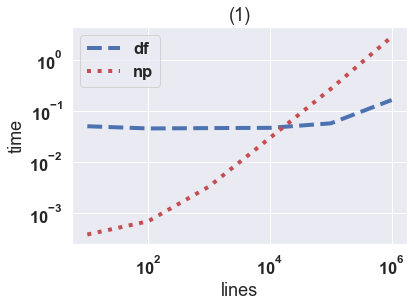

In [161]:
time1 = []
time2 = []
for l in size:
    Table = table[0:l]
    Arr = arr[0:l,:]
    time1.append(timeit('Table[Table.active > 5]',number=100, globals=globals()))
    time2.append(timeit('Arr[Arr[:,0] > 5]', number=100, globals=globals()))
    
Plot("(1)", time1, time2, lines)

## (2)

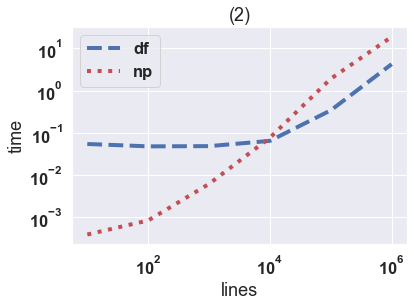

In [168]:
time1 = []
time2 = []
for l in size:
    Table = table[0:l]
    Arr = arr[0:l,:]
    time1.append(timeit('Table[Table.voltage > 235]',number=100, globals=globals()))
    time2.append(timeit('Arr[Arr[:,2] > 235]', number=100, globals=globals()))
    
Plot("(2)", time1, time2, lines)

## (3)

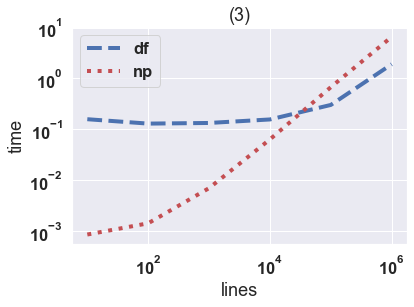

In [169]:
time1 = []
time2 = []
for l in size:
    Table = table[0:l]
    Arr = arr[0:l,:]
    time1.append(timeit('Table[(Table.intensity <= 20)&(Table.intensity >= 19)&(Table.metering2 > Table.metering3)]',number=100, globals=globals()))
    time2.append(timeit('Arr[(Arr[:,3] >= 19)&(Arr[:,3] <= 20)&(Arr[:,5] > Arr[:,6])]', number=100, globals=globals()))
    
Plot("(3)", time1, time2, lines)

## (4)

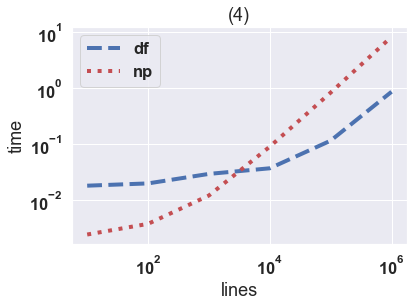

In [193]:
time1 = []
time2 = []
for l in size:
    Table = table[0:l]
    Arr = arr[0:l,:]
    
    def Mean1():
        Mean1 = Table['metering1'].mean()
        Mean2 = Table['metering2'].mean()
        Mean3 = Table['metering3'].mean()
        return (f"Mean1: {Mean1}",f"Mean2: {Mean2}", f"Mean3: {Mean3}")
    
    def Mean2():
        Mean1 = np.mean(Arr[:,4])
        Mean2 = np.mean(Arr[:,5])
        Mean3 = np.mean(Arr[:,6])
        return (f"Mean1: {Mean1}",f"Mean2: {Mean2}", f"Mean3: {Mean3}")
    
    time1.append(timeit('Mean1()', number=100, globals=globals()))
    time2.append(timeit('Mean2()', number=100, globals=globals()))
    
Plot("(4)", time1, time2, lines)

## (5)

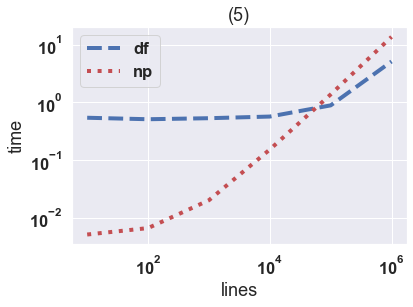

In [254]:
time1 = []
time2 = []
for l in size:
    Table = table[0:l]
    Arr = arr[0:l,:]   
    
    def First():
        time = Table[(Table['active']>6) & (Table['metering2']>Table['metering1']) & (Table['metering2']>=Table['metering3'])]
        first, second = np.array_split(time, 2)
        result1 = time.iloc[::3]
        return result1
    def Second():
        max_met2= Arr[(Arr[:,0] > 6) & (Arr[:,5] > Arr[:,4]) & (Arr[:,5] >= Arr[:,6])]
        first, second = np.array_split(max__met2, 2)
        result2 = first[::3]
        return result2
        
    time1.append(timeit('First()',number=100, globals=globals()))
    time2.append(timeit('Second()', number=100, globals=globals()))
    
Plot("(5)", time1, time2, lines)